# XGBoost

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
%cd ../data_loader/src

/Users/socratis/PycharmProjects/intern_task_VK/data_loader/src


In [3]:
from data_loader import DataLoader

data_loader = DataLoader()
df = data_loader.load_data()

In [4]:
%cd ../../data_preprocessing/src

/Users/socratis/PycharmProjects/intern_task_VK/data_preprocessing/src


In [5]:
from data_preprocessing import DataPreprocessor

data_prep = DataPreprocessor()
y, data, X_train, X_test, y_train, y_test, X_train_rus, X_test_rus, y_train_rus, y_test_rus = data_prep.preprocess_data(df)

In [6]:
X_train_rus

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,query_id
138319,0.071150,-0.356135,-0.183032,-0.695715,0.033167,-0.403869,-0.36671,-0.494892,0.304661,-0.541385,...,-0.003950,-0.697956,-1.520542,-0.424175,-0.718582,-0.635632,-0.109498,-0.132761,-0.341088,17425
140156,0.071150,-0.356135,0.781073,0.568595,0.033167,0.576653,-0.36671,1.092516,0.331711,0.531247,...,-0.003950,0.543102,0.677024,0.211022,0.556642,-0.276118,-0.097525,0.196869,0.553386,17635
173426,0.071150,-0.356135,0.781073,-0.695715,0.033167,0.576653,-0.36671,1.092516,0.821601,0.531247,...,-0.003941,-0.697956,0.656040,0.076420,-0.718582,0.456402,-0.082198,-0.101368,-0.108757,21250
141006,0.071150,-0.356135,0.781073,1.832906,0.033167,0.576653,-0.36671,1.092516,0.344226,0.531247,...,-0.003950,2.138744,0.734952,0.246185,1.831865,0.299973,-0.128656,-0.321121,-0.596652,17710
34740,0.071150,-0.356135,-0.183032,-0.695715,0.033167,0.576653,-0.36671,-0.098040,-1.220508,0.531247,...,-0.003950,-0.697956,0.442859,-0.112962,-0.718582,-0.203196,-0.012751,-0.069974,-0.039058,4780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137416,0.071150,-0.356135,0.781073,1.832906,0.033167,0.576653,-0.36671,1.092516,0.291365,0.531247,...,-0.003950,2.138744,0.732733,0.327380,1.831865,0.219135,-0.127699,-0.022884,0.065491,17350
72202,0.071150,-0.356135,-0.183032,1.832906,0.033167,0.576653,-0.36671,-0.098040,-0.668891,0.531247,...,-0.003950,1.107217,0.720746,-0.055853,1.831865,0.160755,-0.124346,-0.038581,0.030641,9655
10426,-0.737015,-0.356135,-0.183032,-0.695715,-0.797721,-0.894132,-0.36671,-0.098040,-1.578524,-1.077703,...,-0.003950,-0.697956,-1.807048,-0.437773,-0.718582,-0.524090,-0.105188,-0.321121,-0.596652,1390
27387,-0.737015,-0.356135,-1.147138,-0.695715,-0.797721,-0.894132,-0.36671,-1.288596,-1.328778,-1.077703,...,-0.003950,-0.697956,-1.646929,-0.721658,-0.718582,-0.776949,-0.128177,-0.258334,-0.457254,3745


In [7]:
X_train.sort_values(by='query_id', inplace=True)

In [8]:
X_train_rus.sort_values(by='query_id', inplace=True)

### XGBoost без балансировки данных

In [9]:
X_train.sort_values(by='query_id', inplace=True)
ranker_no_balance = xgb.XGBRanker(tree_method="hist", lambdarank_num_pair_per_sample=8, objective="rank:ndcg",
                                          eval_metric='ndcg@5', lambdarank_pair_method="topk")
ranker_no_balance.fit(X_train, y_train, qid=X_train['query_id'])

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric='ndcg@5', feature_types=None, gamma=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          lambdarank_num_pair_per_sample=8, lambdarank_pair_method='topk',
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, ...)

In [10]:
X_test.sort_values(by='query_id', inplace=True)
predict_no_balance = ranker_no_balance.predict(X_test)

In [11]:
sorted_idx = np.argsort(predict_no_balance)[::-1]
predict_no_balance = predict_no_balance[sorted_idx]
#Оценки релевантности
predict_no_balance

array([ 1.6676787,  1.5534868,  1.5082676, ..., -1.6285673, -1.6355072,
       -1.9913292], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

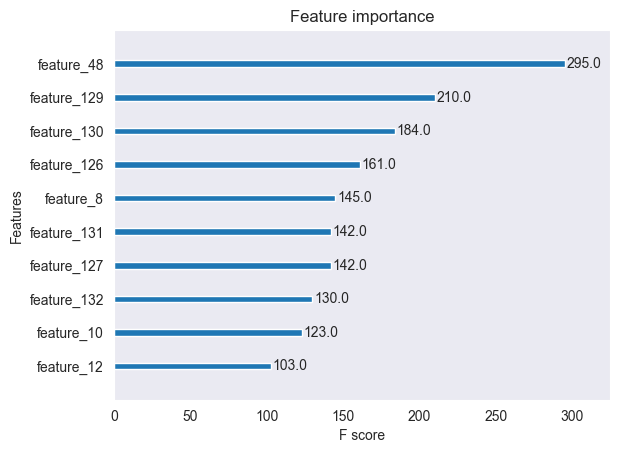

In [12]:
plot_importance(ranker_no_balance,max_num_features=10, grid=False)

### XGBoost с Undersampling

In [13]:
X_train_rus.sort_values(by='query_id', inplace=True)
ranker_rus = xgb.XGBRanker(tree_method="hist", lambdarank_num_pair_per_sample=8, objective="rank:ndcg",
                                   eval_metric='ndcg@5', lambdarank_pair_method="topk")
ranker_rus.fit(X_train_rus, y_train_rus, qid=X_train_rus['query_id'])

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None, device=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric='ndcg@5', feature_types=None, gamma=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          lambdarank_num_pair_per_sample=8, lambdarank_pair_method='topk',
          learning_rate=None, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, multi_strategy=None, n_estimators=None,
          n_jobs=None, ...)

In [14]:
predict_rus = ranker_rus.predict(X_test_rus)
predict_rus

array([-0.1219938 , -0.03854752,  1.2679379 , ..., -0.01545144,
       -0.61172146,  0.4154464 ], dtype=float32)

In [15]:
sorted_idx = np.argsort(predict_rus)[::-1]
predict_rus = predict_rus[sorted_idx]
#Оценки релевантности
predict_rus

array([ 2.2788534,  2.206377 ,  1.8624297, ..., -2.0801528, -2.0926406,
       -2.3031666], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

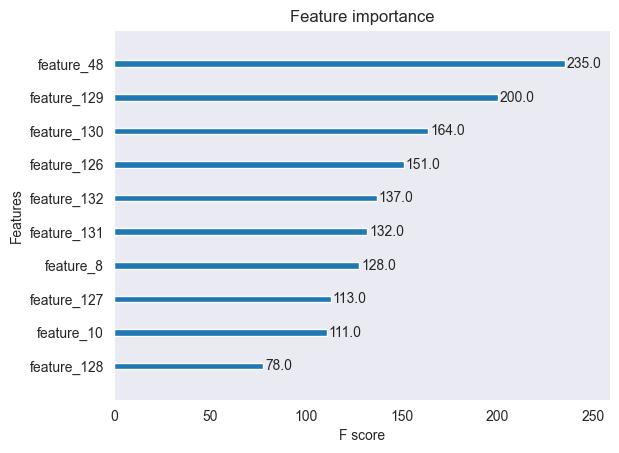

In [16]:
plot_importance(ranker_rus,max_num_features=10, grid=False)